In [ ]:
import tensorflow as tf
import cv2
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import zipfile
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_path="/content/drive/MyDrive/FaceEmotionDetectionProject/Final_Model.h5"

In [ ]:
path="/content/drive/MyDrive/FaceEmotionDetectionProject/"
print(os.listdir(path))

['dataPre.ipynb', 'FaceEmotionDetectionData.zip', 'FaceEmotionDetectionProject', '__MACOSX']


In [ ]:
zip_path = '/content/drive/MyDrive/FaceEmotionDetectionProject/FaceEmotionDetectionData.zip'

unzip_dir = "/content/drive/MyDrive/FaceEmotionDetectionProject/"

# # Unzipping
print("started unzipping")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("unzipping...")
    zip_ref.extractall(unzip_dir)
    print("unzipping done !")

# Checking the content of the unzipped folder
print(os.listdir(unzip_dir))

started unzipping
unzipping...
unzipping done !
['dataPre.ipynb', 'FaceEmotionDetectionData.zip', 'FaceEmotionDetectionProject', '__MACOSX']


In [ ]:
data_path="/content/drive/MyDrive/FaceEmotionDetectionProject/FaceEmotionDetectionProject/train/"

# **Data** **Exploration**

In [ ]:
img_sample=cv2.imread(data_path+'0/Training_92439792.jpg')

In [ ]:
print(img_sample)

[[[ 21  21  21]
  [ 18  18  18]
  [ 27  27  27]
  ...
  [ 84  84  84]
  [ 52  52  52]
  [ 63  63  63]]

 [[ 21  21  21]
  [ 21  21  21]
  [ 28  28  28]
  ...
  [ 88  88  88]
  [ 72  72  72]
  [ 92  92  92]]

 [[ 23  23  23]
  [ 28  28  28]
  [ 33  33  33]
  ...
  [102 102 102]
  [105 105 105]
  [117 117 117]]

 ...

 [[254 254 254]
  [253 253 253]
  [255 255 255]
  ...
  [163 163 163]
  [158 158 158]
  [156 156 156]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [152 152 152]
  [165 165 165]
  [152 152 152]]

 [[254 254 254]
  [255 255 255]
  [253 253 253]
  ...
  [157 157 157]
  [147 147 147]
  [143 143 143]]]


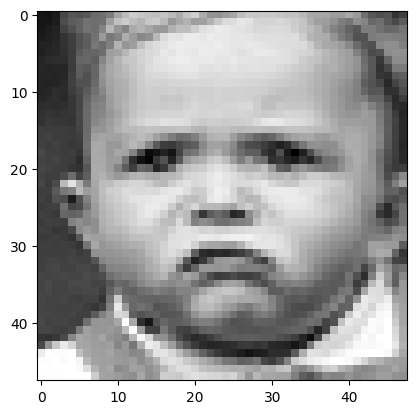

In [ ]:
plt.imshow(img_sample)

In [ ]:
DataDirectory="/content/drive/MyDrive/FaceEmotionDetectionProject/FaceEmotionDetectionProject/train/"

In [ ]:
classes=['0','1','2','3','4','5','6']

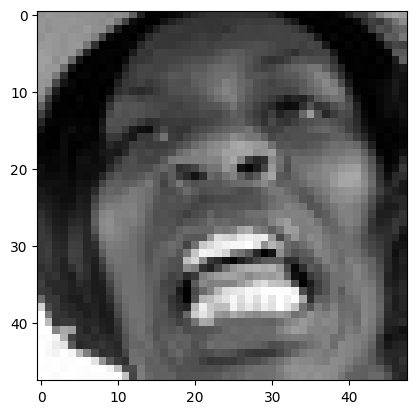

In [ ]:
for category in classes:
    path= os.path.join(DataDirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

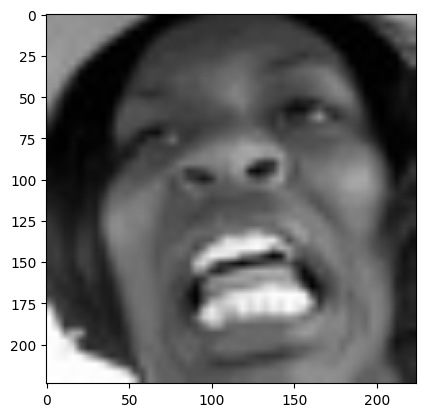

In [ ]:
img_size=224
img_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
plt.show()

#**Read all images**

In [ ]:
training_data=[]
def create_training_data():
    for category in classes:
        print("started new category")
        path= os.path.join(DataDirectory,category)
        class_id=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                resized_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([resized_array,class_id])
            except Exception as e :
                pass

In [ ]:
create_training_data()

started new category
started new category
started new category
started new category
started new category
started new category
started new category


In [ ]:
print(len(training_data))

#training_data

16294


In [ ]:
random.shuffle(training_data)

In [ ]:
X=[]
y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,img_size,img_size,3)

In [ ]:
X.shape

(16294, 224, 224, 3)

In [ ]:
#normalizing data
X=X/255.0

In [ ]:
Y=np.array(y)

In [ ]:
Y.shape

(16294,)

#**MobileNetV2 model download**





In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=tf.keras.applications.MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)



#**Defining CNN Layers for Multi-Class Classification**

In [ ]:
base_input=model.layers[0].input

In [ ]:
base_output=model.layers[-2].output

In [ ]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
final_output=layers.Dense(128)(base_output)#adding new layer , after the output of global pooling layer
final_output=layers.Activation('relu')(final_output)#activation functions
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)#7 for number of classes

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# **Defining a Custom Checkpoint**

In [ ]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.epoch_count = 0

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_count += 1
        if self.epoch_count % 5 == 0:  # Save every 5 epochs
            super().on_epoch_end(epoch, logs)

# Define the custom checkpoint callback
custom_checkpoint_callback = CustomModelCheckpoint(
    'model_checkpoint_{epoch:02d}.h5',
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

# **Model Training**

In [ ]:
new_model.fit(X,Y,epochs=20,callbacks=[custom_checkpoint_callback])

Epoch 1/25
510/510 [==============================] - 410s 780ms/step - loss: 1.3736 - accuracy: 0.4815
Epoch 2/25
510/510 [==============================] - 379s 742ms/step - loss: 1.1713 - accuracy: 0.5585
Epoch 3/25
510/510 [==============================] - 377s 738ms/step - loss: 1.0831 - accuracy: 0.5947
Epoch 4/25
510/510 [==============================] - 376s 737ms/step - loss: 1.0144 - accuracy: 0.6194
Epoch 5/25
510/510 [==============================] - 383s 751ms/step - loss: 0.9428 - accuracy: 0.6470
Epoch 6/25
510/510 [==============================] - 380s 746ms/step - loss: 0.8816 - accuracy: 0.6713
Epoch 7/25
510/510 [==============================] - 378s 741ms/step - loss: 0.8153 - accuracy: 0.6998
Epoch 8/25
510/510 [==============================] - 376s 738ms/step - loss: 0.7672 - accuracy: 0.7183
Epoch 9/25
510/510 [==============================] - 373s 732ms/step - loss: 0.7051 - accuracy: 0.7403
Epoch 10/25
510/510 [==============================] - 375s 736m

In [ ]:
new_model.save('Final_model_95p.h5')

In [ ]:
remaining_epochs = 5
new_model.fit(X,Y,epochs=remaining_epochs)

Epoch 1/5
450/510 [=========================>....] - ETA: 47s - loss: 0.5697 - accuracy: 0.7929